In [8]:
#TO SHOW THE DATA SETS FOR WEIGHT LOSS
import numpy as np
import pandas as pd
import os
path='D:/Data sets/wtloss.csv'
df=pd.read_csv(path,na_values='NA',usecols=[0,1,2])
print(df.head())
print(df.tail())


   SL.NO  Days  Weight
0      1     0  184.35
1      2     4  182.51
2      3     7  180.45
3      4     7  179.91
4      5    11  177.91
    SL.NO  Days  Weight
47     48   225   116.0
48     49   233   115.5
49     50   238   112.6
50     51   241   114.0
51     52   246   112.6


In [10]:
#TO CALCULATE TOTAL NUMBER OF DAYS TAKEN TO WEIGHT LOSS
df=pd.read_csv(path,na_values='NA',usecols=[1])
total_days=np.max(df)
print('toal days taken to weight loss:',total_days)
month=total_days/30
print('toal month taken to weight loss:',month)


toal days taken to weight loss: Days    246
dtype: int64
toal month taken to weight loss: Days    8.2
dtype: float64


In [11]:
#TO CALCULATE THE WEIGHT LOSS
df=pd.read_csv(path,na_values='NA',usecols=['Weight'])
average_wt=np.mean(df)
print('avg_weight:',average_wt)
recent_weight=np.min(df)
print('recent weight:',recent_weight)
total_wtloss=np.max(df)-np.min(df)
print('total kgs lost:',total_wtloss)


avg_weight: Weight    142.248077
dtype: float64
recent weight: Weight    112.6
dtype: float64
total kgs lost: Weight    71.75
dtype: float64


array([[<AxesSubplot:title={'center':'Days'}>,
        <AxesSubplot:title={'center':'Weight'}>]], dtype=object)

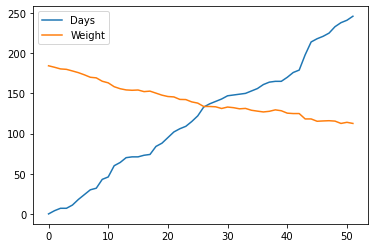

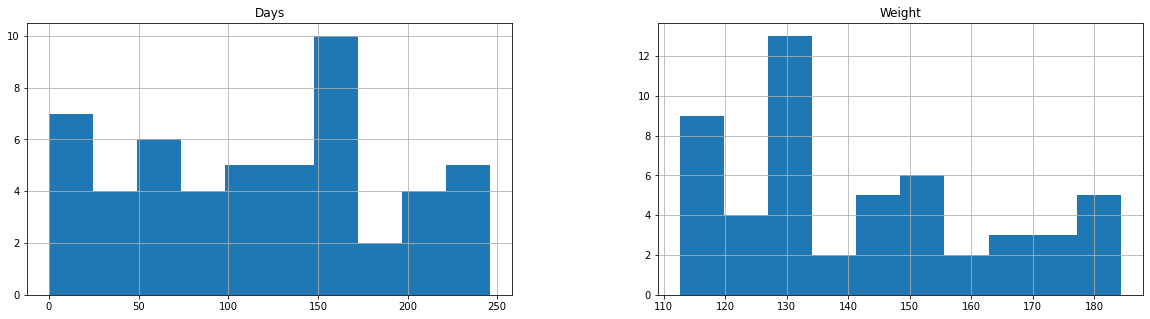

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv(path,na_values='NA',usecols=['Days','Weight'])
df.plot()
df.hist(figsize=(20,5))

In [51]:
path='D:/Data sets/wtloss.csv'
df=pd.read_csv(path,na_values='NA',usecols=[0,1,2])
df.describe(include='all')

,SL.NO,Days,Weight
count,52.000000,52.000000,52.000000
mean,26.500000,119.153846,142.248077
std,15.154757,71.517826,21.102614
min,1.000000,0.000000,112.600000
25%,13.750000,68.500000,127.500000
50%,26.500000,127.500000,135.800000
75%,39.250000,165.000000,154.682500
max,52.000000,246.000000,184.350000


In [56]:
path='D:/Data sets/wtloss.csv'
df=pd.read_csv(path,na_values='NA',usecols=[2])
sort=sorted(df.Weight)
q1,q3=np.percentile(df.Weight,[25,75])
print('25 percentile:',q1,'\t 75 percentile:',q3)
IQR=q3-q1
print('IQR IS:',IQR)
lower_fence=q1-(1.5*IQR)
upper_fence=q3+(1.5*IQR)
print("lower fence is:",lower_fence)
print("upper fence is:",upper_fence)



25 percentile: 127.5 	 75 percentile: 154.6825
IQR IS: 27.182500000000005
lower fence is: 86.72625
upper fence is: 195.45625


In [57]:
path='D:/Data sets/wtloss.csv'
df=pd.read_csv(path,na_values='NA',usecols=[2])
outliers=[]
def detect_outliers(data):
    threshold=2
    mean=np.mean(data)
    std=np.std(data)
    for i in df.Weight:
        z_score=(i-mean)/std
        #print(z_score)
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers
print(detect_outliers(df.Weight))

[184.35]


C:\Users\91978\Documents\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91978\Documents\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

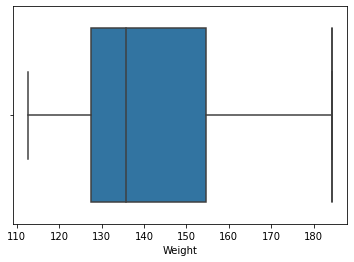

In [62]:
import seaborn as sns
sns.boxplot(outliers)
sns.boxplot(df['Weight'])
plt.show()
#plt.show()